In [7]:
!pip install fastai --upgrade

     |████████████████████████████████| 358kB 7.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [2]:
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224)
)

In [3]:
learn = cnn_learner(dls, resnet34,metric=error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,time
0,0.151796,0.028526,01:03


epoch,train_loss,valid_loss,time
0,0.054917,0.020289,01:11
1,0.026047,0.008673,01:11


In [5]:
from ipywidgets import widgets

uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Is this a cat ?  {'True'}
probably  tensor([2.6267e-09, 1.0000e+00]) , I think.


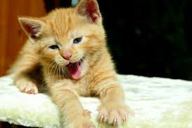

In [9]:
img = PILImage.create(uploader.data[0])
is_cat,_, probs = learn.predict(img)
print("Is this a cat ? ",{is_cat} )
print("probably ", probs, ", I think.")
img.to_thumb(192)

